# Part 1 - Initial EDA (Word Analysis)

### Packages

In [52]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter

### Data Engineering

In [99]:
data = pd.read_csv("data/inaugural_address.csv")
data = data.drop(data.columns[0], axis=1)
data["word count"] = data["text"].str.split().str.len()
data["character count"] = data["text"].str.len()
data["year"] = data["date"].str[:4]

# needed to fix Trump's label in the dataset
data.iloc[52, 0] = "Donald J. Trump"
data.iloc[54, 0] = "Donald J. Trump"

In [102]:
data.head()

,president_name,president_number,date,text,word count,character count,year
0,George Washington,1,1789-04-30 00:00:00+00:00,\nFellow-Citizens of the Senate and of the Hou...,1430,8625,1789
1,George Washington,1,1793-03-04 00:00:00+00:00,\nFellow Citizens:\nI AM again called upon by ...,135,788,1793
2,John Adams,2,1797-03-04 00:00:00+00:00,"\nWHEN it was first perceived, in early times,...",2319,13864,1797
3,Thomas Jefferson,3,1801-03-04 00:00:00+00:00,\nFriends and Fellow-Citizens:\nCALLED upon to...,1717,10117,1801
4,Thomas Jefferson,3,1805-03-04 00:00:00+00:00,"\nPROCEEDING, fellow-citizens, to that qualifi...",2157,12892,1805


## Visualizations

### Word Count Patterns

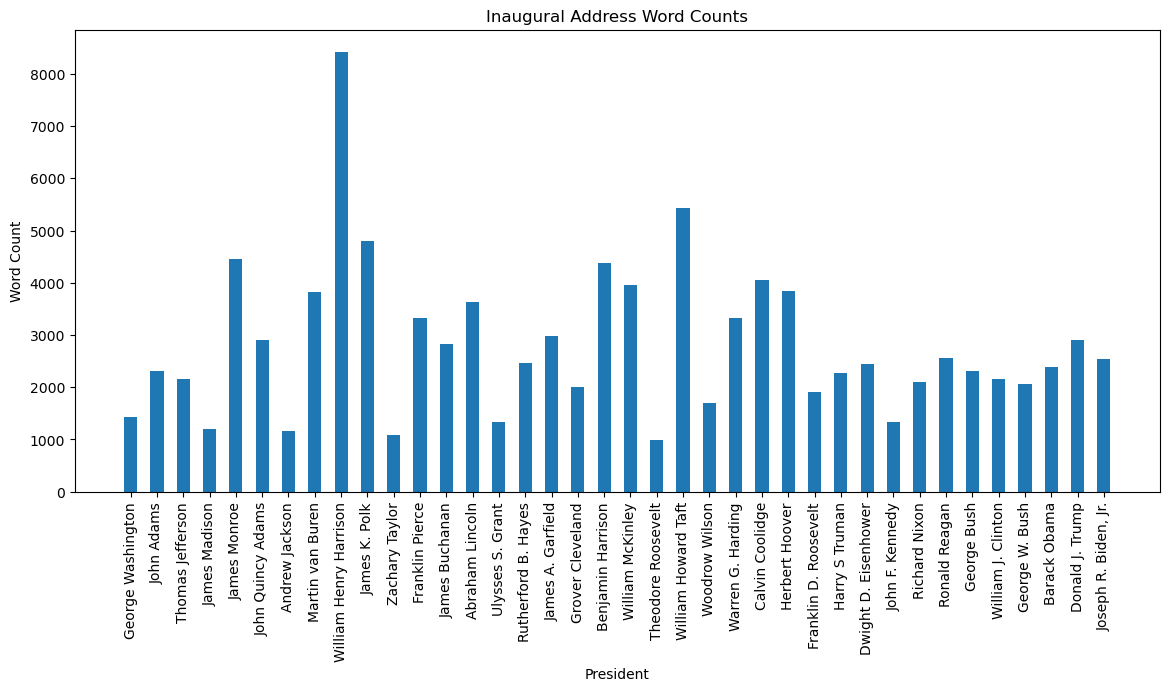

In [104]:
plt.figure(figsize=(14, 6))
plt.bar(data["president_name"], data["word count"], width=0.5)
plt.title("Inaugural Address Word Counts")
plt.xlabel("President")
plt.ylabel("Word Count")
plt.xticks(rotation=90)
plt.show()

In [105]:
# explanation

### Character Count Patterns

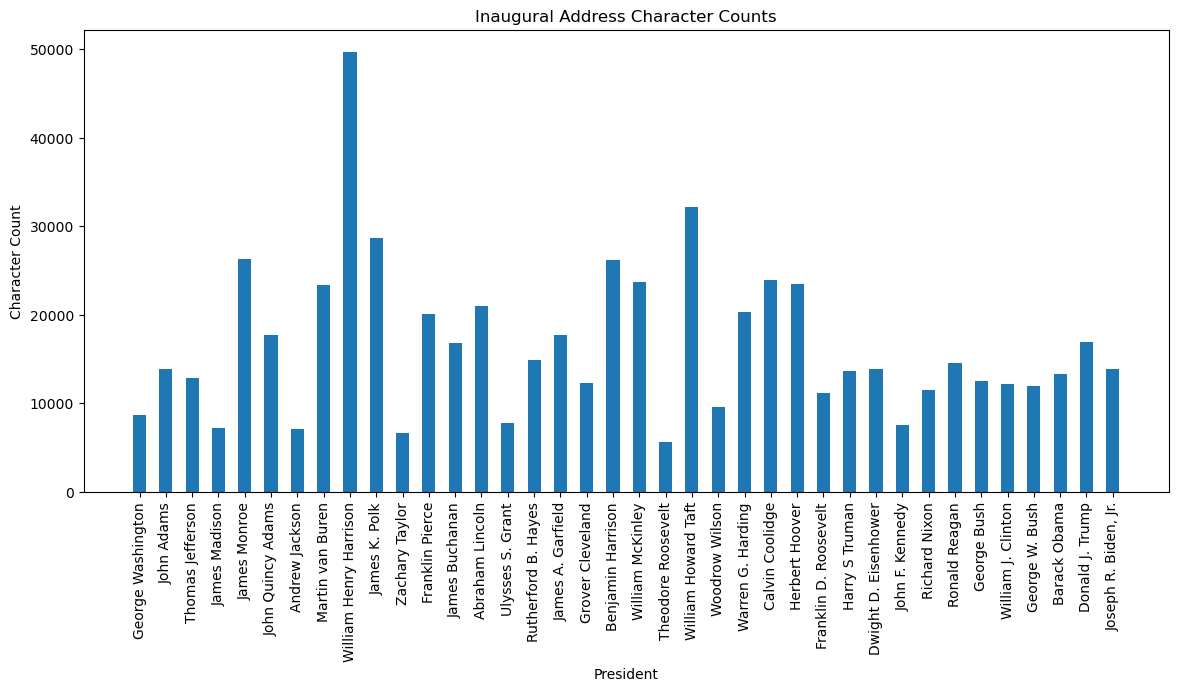

In [107]:
plt.figure(figsize=(14, 6))
plt.bar(data["president_name"], data["character count"], width=0.5)
plt.title("Inaugural Address Character Counts")
plt.xlabel("President")
plt.ylabel("Character Count")
plt.xticks(rotation=90)
plt.show()

In [108]:
# explanation

### Word & Character Count differences between multi-term Presidents

In [133]:
data_counts = data["president_name"].value_counts()
indicies = data_counts[data_counts > 1].index
data_filtered = data[data["president_name"].isin(indicies)]
data_organized = data_filtered.sort_values(["president_name", "year"])
data_organized["term"] = data_organized.groupby("president_name").cumcount() + 1

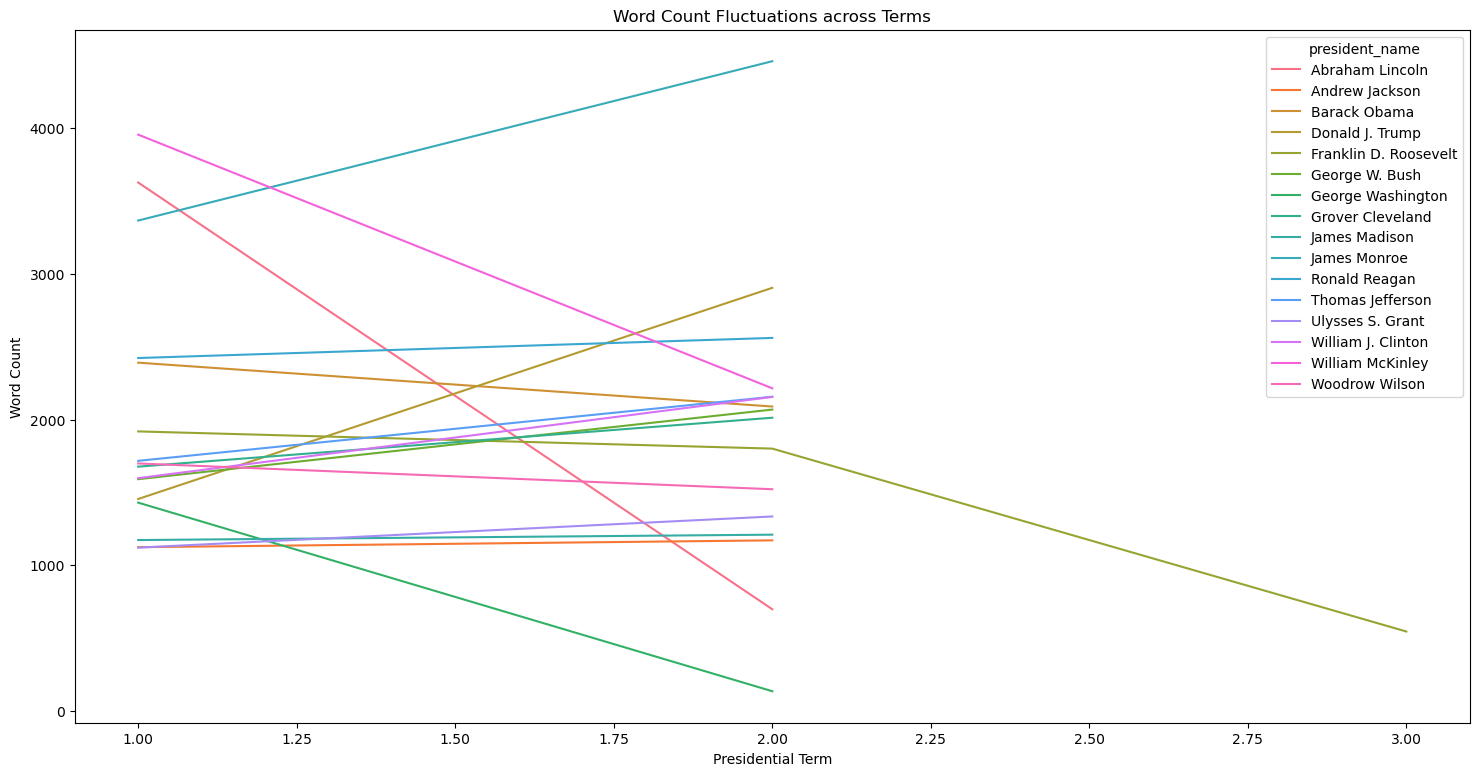

In [134]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data_organized, x="term", y="word count", hue="president_name")
plt.title("Word Count Fluctuations across Terms")
plt.xlabel("Presidential Term")
plt.ylabel("Word Count")
plt.show()

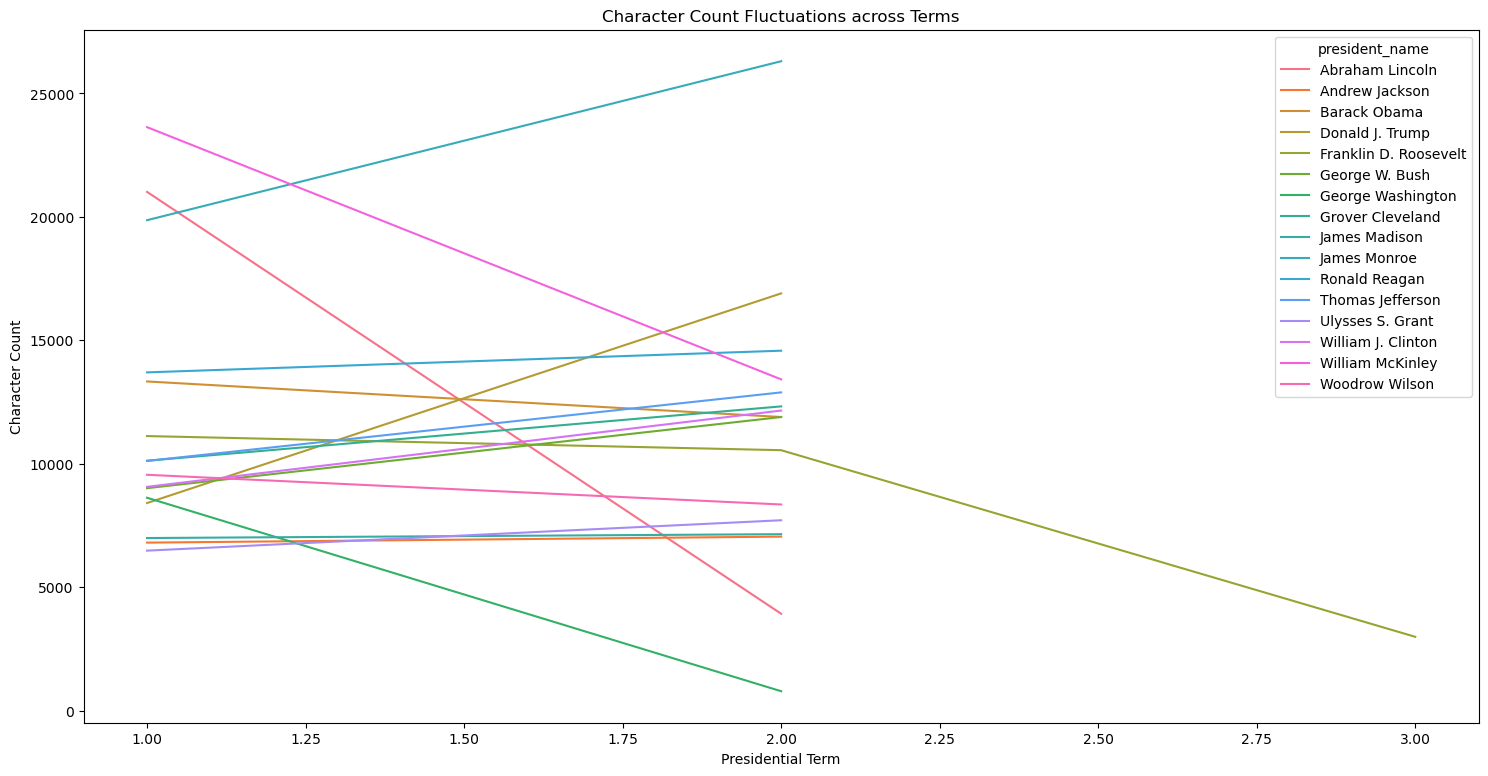

In [135]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data_organized, x="term", y="character count", hue="president_name")
plt.title("Character Count Fluctuations across Terms")
plt.xlabel("Presidential Term")
plt.ylabel("Character Count")
plt.show()

In [136]:
# explanation

In [119]:
# Common Words used - changes in frequencies over time
# some kind of scatter/regression plot with two variables